# Contents<a id='back'></a>

* [Introduction](#intro)
* [Stage 1. Data overview](#overview)
* [Stage 2. Data preprocessing](#preprocessing)
* [Stage 3. EDA](#eda)
    * [3.1 Data visualization](#dv)
    * [3.2 Convert categorical variables to dummies](#dummies)
* [Stage 4. Train model with imbalance dataset](#stg4)
     * [4.1 Split dataset](#split)
     * [4.2 Train Model: Random Forest Model](#rfm)
* [Stage 5. Improve the quality of the model](#stg5)
     * [5.1 Method 1: Upsampling](#upsample)
     * [5.2 Method 2: Downsampling](#downsample)
* [Conclusion](#end)

# Introduction<a id='intro'></a>

Beta Bank customers are leaving: little by little, chipping away every month. The bankers figured out it’s cheaper to save the existing customers rather than to attract new ones.

We need to predict whether a customer will leave the bank soon. You have the data on clients’ past behavior and termination of contracts with the bank.

Build a model with the maximum possible F1 score. To pass the project, you need an F1 score of at least 0.59. Check the F1 for the test set. Additionally, measure the AUC-ROC metric and compare it with the F1 .

**Instructions**
1. Download and prepare the data. Explain the procedure.
2. Examine the balance of classes. Train the model without taking into account the imbalance. Briefly describe your findings.
3. Improve the quality of the model. Make sure you use at least two approaches to fixing class imbalance. Use the training set to pick the best parameters. Train different models on training and validation sets. Find the best one. Briefly describe your findings.
4. Perform the final testing.

## Stage 1. Data overview<a id='overview'></a>

In [1]:
# Loading all the libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
# Load the data

df_churn = pd.read_csv("Churn.csv")

In [3]:
# Display data

df_churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


## Stage 2. Data preprocessing<a id='preprocessing'></a>

**Observation:**

`Tenure` column contains missing value. Fill in with `Median` because it is more stable than `Mean`.

In [5]:
# Fill in missing value with median

df_churn['Tenure'] = df_churn['Tenure'].fillna(df_churn['Tenure'].median())

**Discard irrelavant columns**

`CustomerId`, `Surname` and `RowNumber` is not needed when training the dataset. Hence, we will remove these columns.

In [6]:
df_churn = df_churn.drop(columns=['CustomerId', 'Surname', 'RowNumber'])
df_churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


## Stage 3. EDA<a id='eda'></a>

### Data visualization<a id='dv'></a>

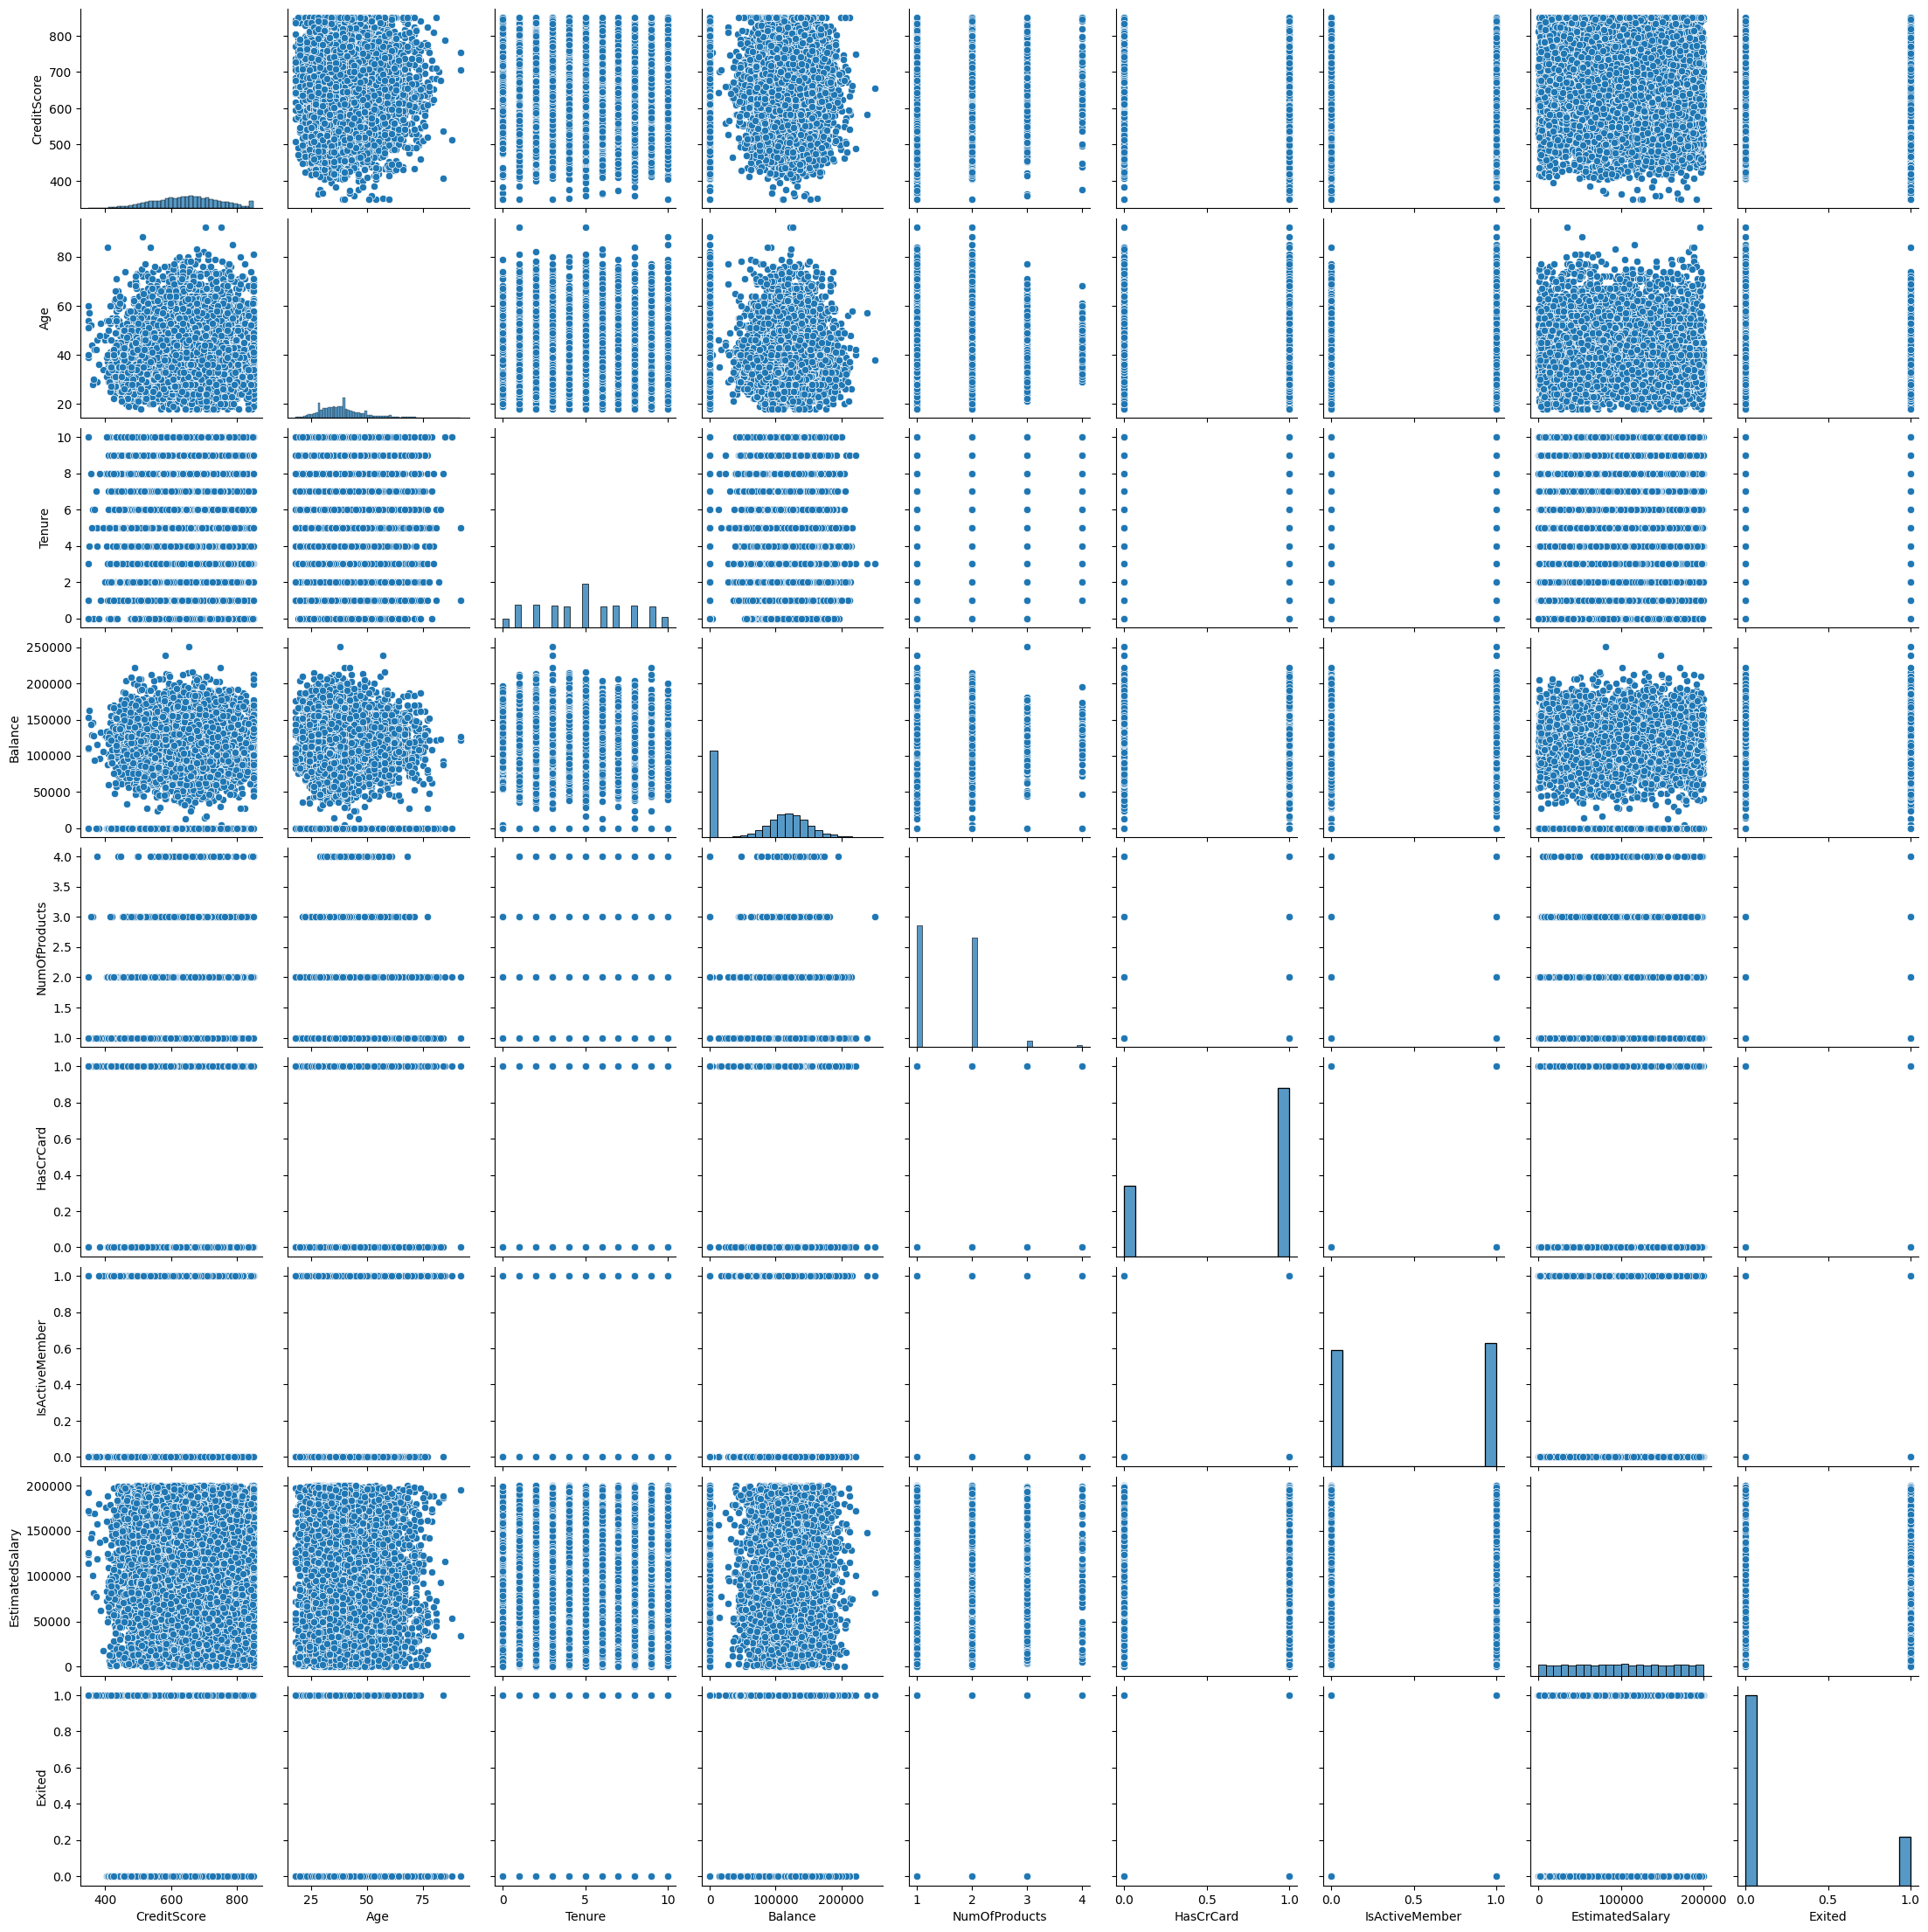

In [7]:
sns.pairplot(df_churn)

**Observation**

There is no strong noticeable relation between the columns in the dataset.

In [8]:
# Check the balance of customers who left and who remains

print("Percentage of Customers that have left", len(df_churn[df_churn['Exited'] == 1])/len(df_churn)*100)
print("Percentage of Customers that remain", len(df_churn[df_churn['Exited'] == 0])/len(df_churn)*100)

Percentage of Customers that have left 20.369999999999997
Percentage of Customers that remain 79.63


**Conclusions:**

The customers who remain with the bank is 79.6%, this is more than the customers who have left the bank (20.4%). This shows an imbalance in the data.

### Convert categorical variables to dummies<a id='dummies'></a>

In [9]:
df_churn = pd.get_dummies(df_churn, drop_first=True)
df_churn.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


## Stage 4. Train the model without taking into account the imbalance<a id='stg4'></a>

In [10]:
# Import the model

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

### Split the data into train, valid and test<a id='split'></a>

In [11]:
# Train Test Split

X = df_churn.drop(columns=['Exited'])
y = df_churn[['Exited']]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

### Train Model: Random Forest model<a id='rfm'></a>

In [13]:
depths = [None, 1, 2, 3, 4, 5]
samples_split = [1,2,3,4,5]
samples_leaf = [1,2,3,4,5]

best_f1 = {"depth":0, "split":0, "leaf":0, "f1":0}
for i in depths:
    for j in samples_split:
        for k in samples_leaf:
            # create a regressor object 
            clf = RandomForestClassifier(max_depth=i, min_samples_split=j, min_samples_leaf=k)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_val)
            print(f"Max Depth-{i}, Samples Split-{j}, Samples Leaf-{k}:" ,f1_score(y_val, y_pred))
            
            if best_f1['f1'] < f1_score(y_val, y_pred):
                best_f1['depth'] = i
                best_f1['split'] = j
                best_f1['leaf'] = k
                best_f1['f1'] = f1_score(y_val, y_pred)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-None, Samples Split-1, Samples Leaf-1: 0.5569176882661996


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-None, Samples Split-1, Samples Leaf-2: 0.5594405594405595


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-None, Samples Split-1, Samples Leaf-3: 0.5441696113074205


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-None, Samples Split-1, Samples Leaf-4: 0.5541740674955596


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-None, Samples Split-1, Samples Leaf-5: 0.5571428571428572


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-None, Samples Split-2, Samples Leaf-1: 0.554006968641115


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-None, Samples Split-2, Samples Leaf-2: 0.5530434782608696


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-None, Samples Split-2, Samples Leaf-3: 0.547703180212014


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-None, Samples Split-2, Samples Leaf-4: 0.5460992907801419


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-None, Samples Split-2, Samples Leaf-5: 0.5604203152364273


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-None, Samples Split-3, Samples Leaf-1: 0.5488850771869639


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-None, Samples Split-3, Samples Leaf-2: 0.5470383275261325


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-None, Samples Split-3, Samples Leaf-3: 0.5559440559440559


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-None, Samples Split-3, Samples Leaf-4: 0.5483304042179262


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-None, Samples Split-3, Samples Leaf-5: 0.5567375886524822


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-None, Samples Split-4, Samples Leaf-1: 0.5601374570446735


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-None, Samples Split-4, Samples Leaf-2: 0.5555555555555556


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-None, Samples Split-4, Samples Leaf-3: 0.5570934256055363


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-None, Samples Split-4, Samples Leaf-4: 0.5415929203539824


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-None, Samples Split-4, Samples Leaf-5: 0.5467372134038802


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-None, Samples Split-5, Samples Leaf-1: 0.5582191780821917


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-None, Samples Split-5, Samples Leaf-2: 0.548611111111111


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-None, Samples Split-5, Samples Leaf-3: 0.5505226480836237


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-None, Samples Split-5, Samples Leaf-4: 0.5633802816901409


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-None, Samples Split-5, Samples Leaf-5: 0.5541740674955596


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-1, Samples Split-1, Samples Leaf-1: 0.0


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-1, Samples Split-1, Samples Leaf-2: 0.0


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-1, Samples Split-1, Samples Leaf-3: 0.0


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-1, Samples Split-1, Samples Leaf-4: 0.0


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-1, Samples Split-1, Samples Leaf-5: 0.0


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-1, Samples Split-2, Samples Leaf-1: 0.0


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-1, Samples Split-2, Samples Leaf-2: 0.0


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-1, Samples Split-2, Samples Leaf-3: 0.0


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-1, Samples Split-2, Samples Leaf-4: 0.0


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-1, Samples Split-2, Samples Leaf-5: 0.0


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-1, Samples Split-3, Samples Leaf-1: 0.0


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-1, Samples Split-3, Samples Leaf-2: 0.0


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-1, Samples Split-3, Samples Leaf-3: 0.0


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-1, Samples Split-3, Samples Leaf-4: 0.0


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-1, Samples Split-3, Samples Leaf-5: 0.0


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-1, Samples Split-4, Samples Leaf-1: 0.0


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-1, Samples Split-4, Samples Leaf-2: 0.0


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-1, Samples Split-4, Samples Leaf-3: 0.0


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-1, Samples Split-4, Samples Leaf-4: 0.0


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-1, Samples Split-4, Samples Leaf-5: 0.0


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-1, Samples Split-5, Samples Leaf-1: 0.0


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-1, Samples Split-5, Samples Leaf-2: 0.0


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-1, Samples Split-5, Samples Leaf-3: 0.0


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-1, Samples Split-5, Samples Leaf-4: 0.0


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-1, Samples Split-5, Samples Leaf-5: 0.0


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-2, Samples Split-1, Samples Leaf-1: 0.11320754716981131


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-2, Samples Split-1, Samples Leaf-2: 0.14814814814814814


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-2, Samples Split-1, Samples Leaf-3: 0.11827956989247311


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-2, Samples Split-1, Samples Leaf-4: 0.1081081081081081


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-2, Samples Split-1, Samples Leaf-5: 0.18556701030927836


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-2, Samples Split-2, Samples Leaf-1: 0.15748031496062992


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-2, Samples Split-2, Samples Leaf-2: 0.09264305177111717


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-2, Samples Split-2, Samples Leaf-3: 0.1081081081081081


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-2, Samples Split-2, Samples Leaf-4: 0.16187989556135768


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-2, Samples Split-2, Samples Leaf-5: 0.143236074270557


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-2, Samples Split-3, Samples Leaf-1: 0.13333333333333333


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-2, Samples Split-3, Samples Leaf-2: 0.12834224598930483


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-2, Samples Split-3, Samples Leaf-3: 0.11320754716981131


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-2, Samples Split-3, Samples Leaf-4: 0.13333333333333333


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-2, Samples Split-3, Samples Leaf-5: 0.13829787234042554


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-2, Samples Split-4, Samples Leaf-1: 0.15303430079155672


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-2, Samples Split-4, Samples Leaf-2: 0.13829787234042554


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-2, Samples Split-4, Samples Leaf-3: 0.15748031496062992


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-2, Samples Split-4, Samples Leaf-4: 0.14775725593667546


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-2, Samples Split-4, Samples Leaf-5: 0.143236074270557


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-2, Samples Split-5, Samples Leaf-1: 0.14814814814814814


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-2, Samples Split-5, Samples Leaf-2: 0.16272965879265092


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-2, Samples Split-5, Samples Leaf-3: 0.12332439678284182


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-2, Samples Split-5, Samples Leaf-4: 0.14814814814814814


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-2, Samples Split-5, Samples Leaf-5: 0.12332439678284182


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-3, Samples Split-1, Samples Leaf-1: 0.25552825552825553


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-3, Samples Split-1, Samples Leaf-2: 0.22613065326633164


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-3, Samples Split-1, Samples Leaf-3: 0.2911694510739857


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-3, Samples Split-1, Samples Leaf-4: 0.2890995260663507


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-3, Samples Split-1, Samples Leaf-5: 0.2


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-3, Samples Split-2, Samples Leaf-1: 0.3


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-3, Samples Split-2, Samples Leaf-2: 0.33410672853828305


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-3, Samples Split-2, Samples Leaf-3: 0.27184466019417475


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-3, Samples Split-2, Samples Leaf-4: 0.3120567375886525


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-3, Samples Split-2, Samples Leaf-5: 0.27602905569007263


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-3, Samples Split-3, Samples Leaf-1: 0.23499999999999996


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-3, Samples Split-3, Samples Leaf-2: 0.35079726651480636


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-3, Samples Split-3, Samples Leaf-3: 0.23558897243107768


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-3, Samples Split-3, Samples Leaf-4: 0.2475247524752475


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-3, Samples Split-3, Samples Leaf-5: 0.2863961813842482


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-3, Samples Split-4, Samples Leaf-1: 0.19487179487179487


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-3, Samples Split-4, Samples Leaf-2: 0.27184466019417475


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-3, Samples Split-4, Samples Leaf-3: 0.3628117913832199


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-3, Samples Split-4, Samples Leaf-4: 0.2669902912621359


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-3, Samples Split-4, Samples Leaf-5: 0.3287037037037037


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-3, Samples Split-5, Samples Leaf-1: 0.24317617866004965


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-3, Samples Split-5, Samples Leaf-2: 0.3026004728132388


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-3, Samples Split-5, Samples Leaf-3: 0.2591687041564792


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-3, Samples Split-5, Samples Leaf-4: 0.3192488262910798


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-3, Samples Split-5, Samples Leaf-5: 0.186046511627907


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-4, Samples Split-1, Samples Leaf-1: 0.45


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-4, Samples Split-1, Samples Leaf-2: 0.4421052631578948


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-4, Samples Split-1, Samples Leaf-3: 0.43496801705756927


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-4, Samples Split-1, Samples Leaf-4: 0.4034334763948498


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-4, Samples Split-1, Samples Leaf-5: 0.44444444444444453


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-4, Samples Split-2, Samples Leaf-1: 0.45


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-4, Samples Split-2, Samples Leaf-2: 0.3930885529157668


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-4, Samples Split-2, Samples Leaf-3: 0.4008620689655173


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-4, Samples Split-2, Samples Leaf-4: 0.3965141612200436


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-4, Samples Split-2, Samples Leaf-5: 0.4380165289256199


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-4, Samples Split-3, Samples Leaf-1: 0.4069264069264069


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-4, Samples Split-3, Samples Leaf-2: 0.4279661016949153


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-4, Samples Split-3, Samples Leaf-3: 0.4034334763948498


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-4, Samples Split-3, Samples Leaf-4: 0.3991323210412147


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-4, Samples Split-3, Samples Leaf-5: 0.42918454935622313


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-4, Samples Split-4, Samples Leaf-1: 0.4543610547667343


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-4, Samples Split-4, Samples Leaf-2: 0.427645788336933


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-4, Samples Split-4, Samples Leaf-3: 0.43368421052631567


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-4, Samples Split-4, Samples Leaf-4: 0.423982869379015


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-4, Samples Split-4, Samples Leaf-5: 0.39999999999999997


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-4, Samples Split-5, Samples Leaf-1: 0.4364406779661017


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-4, Samples Split-5, Samples Leaf-2: 0.4297872340425532


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-4, Samples Split-5, Samples Leaf-3: 0.40347071583514105


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-4, Samples Split-5, Samples Leaf-4: 0.46694214876033063


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-4, Samples Split-5, Samples Leaf-5: 0.45833333333333337


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-5, Samples Split-1, Samples Leaf-1: 0.4862745098039216


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-5, Samples Split-1, Samples Leaf-2: 0.484


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-5, Samples Split-1, Samples Leaf-3: 0.48616600790513836


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-5, Samples Split-1, Samples Leaf-4: 0.4790419161676646


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-5, Samples Split-1, Samples Leaf-5: 0.4892367906066536


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-5, Samples Split-2, Samples Leaf-1: 0.5


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-5, Samples Split-2, Samples Leaf-2: 0.4823529411764706


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-5, Samples Split-2, Samples Leaf-3: 0.48818897637795267


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-5, Samples Split-2, Samples Leaf-4: 0.47272727272727283


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-5, Samples Split-2, Samples Leaf-5: 0.485207100591716


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-5, Samples Split-3, Samples Leaf-1: 0.48000000000000004


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-5, Samples Split-3, Samples Leaf-2: 0.485089463220676


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-5, Samples Split-3, Samples Leaf-3: 0.47676767676767673


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-5, Samples Split-3, Samples Leaf-4: 0.47695390781563124


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-5, Samples Split-3, Samples Leaf-5: 0.4941634241245136


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-5, Samples Split-4, Samples Leaf-1: 0.4761904761904762


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-5, Samples Split-4, Samples Leaf-2: 0.4736842105263158


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-5, Samples Split-4, Samples Leaf-3: 0.45360824742268047


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-5, Samples Split-4, Samples Leaf-4: 0.4822134387351778


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-5, Samples Split-4, Samples Leaf-5: 0.4722792607802875


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-5, Samples Split-5, Samples Leaf-1: 0.4736842105263158


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-5, Samples Split-5, Samples Leaf-2: 0.47808764940239046


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-5, Samples Split-5, Samples Leaf-3: 0.4827586206896552


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-5, Samples Split-5, Samples Leaf-4: 0.49115913555992136


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-5, Samples Split-5, Samples Leaf-5: 0.47676767676767673


In [14]:
best_f1

{'depth': None, 'split': 5, 'leaf': 4, 'f1': 0.5633802816901409}

In [15]:
# Use the model on the test set
clf = RandomForestClassifier(max_depth=None, min_samples_split=5, min_samples_leaf=2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("F1 Score on test set: " ,f1_score(y_test, y_pred))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\1251937271.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


F1 Score on test set:  0.592814371257485


**Discussion:**

The initial best F1 score can reach up to 0.56, it is still below the required 0.59. Therefore, to reach F1 score above 0.59, it is necessary to balance the classes.

## Stage 5. Improve the quality of the model<a id='stg5'></a>

Use at least two approaches to fixing class imbalance. Use the training set to pick the best parameters. Train different models on training and validation sets. Find the best one. Briefly describe your findings.

### Method 1: Upsampling<a id='upsample'></a>

In [16]:
# Import relevant library

from imblearn.over_sampling import RandomOverSampler

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

# Resample on the train-validation set

oversampler = RandomOverSampler()
X_train, y_train = oversampler.fit_resample(X, y)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [18]:
depths = [None, 1, 2, 3, 4, 5]
samples_split = [1,2,3,4,5]
samples_leaf = [1,2,3,4,5]

best_f1 = {"depth":0, "split":0, "leaf":0, "f1":0}
for i in depths:
    for j in samples_split:
        for k in samples_leaf:
            # create a regressor object 
            clf = RandomForestClassifier(max_depth=i, min_samples_split=j, min_samples_leaf=k)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_val)
            print(f"Max Depth-{i}, Samples Split-{j}, Samples Leaf-{k}:" ,f1_score(y_val, y_pred))
            
            if best_f1['f1'] < f1_score(y_val, y_pred):
                best_f1['depth'] = i
                best_f1['split'] = j
                best_f1['leaf'] = k
                best_f1['f1'] = f1_score(y_val, y_pred)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-None, Samples Split-1, Samples Leaf-1: 0.9537827494848395


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-None, Samples Split-1, Samples Leaf-2: 0.9380686821250367


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-None, Samples Split-1, Samples Leaf-3: 0.9269298762522099


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-None, Samples Split-1, Samples Leaf-4: 0.9139465875370919


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-None, Samples Split-1, Samples Leaf-5: 0.9054696789536266


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-None, Samples Split-2, Samples Leaf-1: 0.9540906415538553


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-None, Samples Split-2, Samples Leaf-2: 0.9395101799940986


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-None, Samples Split-2, Samples Leaf-3: 0.9277925139994107


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-None, Samples Split-2, Samples Leaf-4: 0.9185667752442996


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-None, Samples Split-2, Samples Leaf-5: 0.9020190023752968


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-None, Samples Split-3, Samples Leaf-1: 0.9518496770405168


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-None, Samples Split-3, Samples Leaf-2: 0.9389200354086751


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-None, Samples Split-3, Samples Leaf-3: 0.9271601297552345


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-None, Samples Split-3, Samples Leaf-4: 0.9173553719008264


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-None, Samples Split-3, Samples Leaf-5: 0.9087124591138865


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-None, Samples Split-4, Samples Leaf-1: 0.9482048263684519


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-None, Samples Split-4, Samples Leaf-2: 0.938438880706922


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-None, Samples Split-4, Samples Leaf-3: 0.9273479031305375


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-None, Samples Split-4, Samples Leaf-4: 0.9145400593471811


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-None, Samples Split-4, Samples Leaf-5: 0.9086595492289443


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-None, Samples Split-5, Samples Leaf-1: 0.9443298969072165


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-None, Samples Split-5, Samples Leaf-2: 0.9356071743604822


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-None, Samples Split-5, Samples Leaf-3: 0.928023598820059


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-None, Samples Split-5, Samples Leaf-4: 0.9209905660377358


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-None, Samples Split-5, Samples Leaf-5: 0.9014836795252225


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-1, Samples Split-1, Samples Leaf-1: 0.7098844672657253


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-1, Samples Split-1, Samples Leaf-2: 0.7313337587747288


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-1, Samples Split-1, Samples Leaf-3: 0.7145581691036237


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-1, Samples Split-1, Samples Leaf-4: 0.7132867132867131


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-1, Samples Split-1, Samples Leaf-5: 0.7356687898089173


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-1, Samples Split-2, Samples Leaf-1: 0.7109549664643883


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-1, Samples Split-2, Samples Leaf-2: 0.7031199742682533


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-1, Samples Split-2, Samples Leaf-3: 0.7065217391304348


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-1, Samples Split-2, Samples Leaf-4: 0.7247386759581882


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-1, Samples Split-2, Samples Leaf-5: 0.714920634920635


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-1, Samples Split-3, Samples Leaf-1: 0.7019570099454604


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-1, Samples Split-3, Samples Leaf-2: 0.7416927899686521


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-1, Samples Split-3, Samples Leaf-3: 0.7164556962025318


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-1, Samples Split-3, Samples Leaf-4: 0.7150554675118859


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-1, Samples Split-3, Samples Leaf-5: 0.7358490566037734


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-1, Samples Split-4, Samples Leaf-1: 0.7125119388729705


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-1, Samples Split-4, Samples Leaf-2: 0.7167300380228137


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-1, Samples Split-4, Samples Leaf-3: 0.7322508755173512


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-1, Samples Split-4, Samples Leaf-4: 0.716503009185936


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-1, Samples Split-4, Samples Leaf-5: 0.715549936788875


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-1, Samples Split-5, Samples Leaf-1: 0.7249357326478149


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-1, Samples Split-5, Samples Leaf-2: 0.7151515151515152


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-1, Samples Split-5, Samples Leaf-3: 0.7222042139384117


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-1, Samples Split-5, Samples Leaf-4: 0.7137854186564789


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-1, Samples Split-5, Samples Leaf-5: 0.7142857142857142


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-2, Samples Split-1, Samples Leaf-1: 0.7473487211478478


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-2, Samples Split-1, Samples Leaf-2: 0.7255723960012899


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-2, Samples Split-1, Samples Leaf-3: 0.7264121173871885


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-2, Samples Split-1, Samples Leaf-4: 0.7352758834469931


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-2, Samples Split-1, Samples Leaf-5: 0.718323277230867


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-2, Samples Split-2, Samples Leaf-1: 0.7509505703422054


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-2, Samples Split-2, Samples Leaf-2: 0.7286173633440515


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-2, Samples Split-2, Samples Leaf-3: 0.7438330170777988


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-2, Samples Split-2, Samples Leaf-4: 0.7426919370382268


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-2, Samples Split-2, Samples Leaf-5: 0.7327532628962088


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-2, Samples Split-3, Samples Leaf-1: 0.7237673830594185


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-2, Samples Split-3, Samples Leaf-2: 0.7513360578434454


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-2, Samples Split-3, Samples Leaf-3: 0.7159162967660114


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-2, Samples Split-3, Samples Leaf-4: 0.7529115517784073


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-2, Samples Split-3, Samples Leaf-5: 0.7496062992125985


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-2, Samples Split-4, Samples Leaf-1: 0.75


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-2, Samples Split-4, Samples Leaf-2: 0.7339163023110556


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-2, Samples Split-4, Samples Leaf-3: 0.7376283846872083


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-2, Samples Split-4, Samples Leaf-4: 0.7461734693877551


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-2, Samples Split-4, Samples Leaf-5: 0.7399813606710158


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-2, Samples Split-5, Samples Leaf-1: 0.7211142766698324


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-2, Samples Split-5, Samples Leaf-2: 0.7322859890990702


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-2, Samples Split-5, Samples Leaf-3: 0.7186700767263428


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-2, Samples Split-5, Samples Leaf-4: 0.7325689494886892


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-2, Samples Split-5, Samples Leaf-5: 0.7454603376871615


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-3, Samples Split-1, Samples Leaf-1: 0.7472035794183445


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-3, Samples Split-1, Samples Leaf-2: 0.7587281795511222


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-3, Samples Split-1, Samples Leaf-3: 0.7550377833753148


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-3, Samples Split-1, Samples Leaf-4: 0.7544303797468355


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-3, Samples Split-1, Samples Leaf-5: 0.7566551832132791


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-3, Samples Split-2, Samples Leaf-1: 0.7534854245880863


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-3, Samples Split-2, Samples Leaf-2: 0.7531725888324873


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-3, Samples Split-2, Samples Leaf-3: 0.7500797957229492


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-3, Samples Split-2, Samples Leaf-4: 0.7569974554707379


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-3, Samples Split-2, Samples Leaf-5: 0.753402975625198


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-3, Samples Split-3, Samples Leaf-1: 0.7486426061961035


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-3, Samples Split-3, Samples Leaf-2: 0.7540258920113674


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-3, Samples Split-3, Samples Leaf-3: 0.7476874003189792


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-3, Samples Split-3, Samples Leaf-4: 0.7505560851604703


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-3, Samples Split-3, Samples Leaf-5: 0.7526066350710899


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-3, Samples Split-4, Samples Leaf-1: 0.7517198248905566


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-3, Samples Split-4, Samples Leaf-2: 0.7575852361588988


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-3, Samples Split-4, Samples Leaf-3: 0.760484622553588


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-3, Samples Split-4, Samples Leaf-4: 0.7520556609740671


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-3, Samples Split-4, Samples Leaf-5: 0.7510333863275039


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-3, Samples Split-5, Samples Leaf-1: 0.7512755102040817


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-3, Samples Split-5, Samples Leaf-2: 0.7463352453792225


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-3, Samples Split-5, Samples Leaf-3: 0.7551213362748187


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-3, Samples Split-5, Samples Leaf-4: 0.7495268138801262


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-3, Samples Split-5, Samples Leaf-5: 0.7518891687657431


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-4, Samples Split-1, Samples Leaf-1: 0.7652284263959391


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-4, Samples Split-1, Samples Leaf-2: 0.7575086942775845


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-4, Samples Split-1, Samples Leaf-3: 0.7645394530022005


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-4, Samples Split-1, Samples Leaf-4: 0.7606165460836741


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-4, Samples Split-1, Samples Leaf-5: 0.7644666875195496


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-4, Samples Split-2, Samples Leaf-1: 0.7699059561128526


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-4, Samples Split-2, Samples Leaf-2: 0.7659574468085107


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-4, Samples Split-2, Samples Leaf-3: 0.7633396107972379


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-4, Samples Split-2, Samples Leaf-4: 0.759748427672956


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-4, Samples Split-2, Samples Leaf-5: 0.7579821200510856


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-4, Samples Split-3, Samples Leaf-1: 0.7568602425015954


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-4, Samples Split-3, Samples Leaf-2: 0.7572877059569075


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-4, Samples Split-3, Samples Leaf-3: 0.7554278416347382


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-4, Samples Split-3, Samples Leaf-4: 0.7561591914087175


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-4, Samples Split-3, Samples Leaf-5: 0.7629513343799058


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-4, Samples Split-4, Samples Leaf-1: 0.7661722940990848


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-4, Samples Split-4, Samples Leaf-2: 0.7624448645242595


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-4, Samples Split-4, Samples Leaf-3: 0.7622377622377622


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-4, Samples Split-4, Samples Leaf-4: 0.7618445988629186


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-4, Samples Split-4, Samples Leaf-5: 0.7554433575260334


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-4, Samples Split-5, Samples Leaf-1: 0.7578814627994956


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-4, Samples Split-5, Samples Leaf-2: 0.763888888888889


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-4, Samples Split-5, Samples Leaf-3: 0.766624843161857


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-4, Samples Split-5, Samples Leaf-4: 0.7576335877862596


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-4, Samples Split-5, Samples Leaf-5: 0.7584464793179665


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-5, Samples Split-1, Samples Leaf-1: 0.7752915222187206


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-5, Samples Split-1, Samples Leaf-2: 0.7669504888047934


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-5, Samples Split-1, Samples Leaf-3: 0.7668557025834909


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-5, Samples Split-1, Samples Leaf-4: 0.7623318385650224


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-5, Samples Split-1, Samples Leaf-5: 0.7689883391112512


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-5, Samples Split-2, Samples Leaf-1: 0.7723144378327592


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-5, Samples Split-2, Samples Leaf-2: 0.7717082412377644


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-5, Samples Split-2, Samples Leaf-3: 0.7702489757327451


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-5, Samples Split-2, Samples Leaf-4: 0.7709851124485272


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-5, Samples Split-2, Samples Leaf-5: 0.7683004455760662


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-5, Samples Split-3, Samples Leaf-1: 0.7762701167560746


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-5, Samples Split-3, Samples Leaf-2: 0.766175528507367


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-5, Samples Split-3, Samples Leaf-3: 0.7707808564231737


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-5, Samples Split-3, Samples Leaf-4: 0.7733499377334994


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-5, Samples Split-3, Samples Leaf-5: 0.7676831185161899


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-5, Samples Split-4, Samples Leaf-1: 0.7706885660138978


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-5, Samples Split-4, Samples Leaf-2: 0.7715189873417722


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-5, Samples Split-4, Samples Leaf-3: 0.7709779179810726


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-5, Samples Split-4, Samples Leaf-4: 0.7650621613006058


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-5, Samples Split-4, Samples Leaf-5: 0.7642379891823099


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-5, Samples Split-5, Samples Leaf-1: 0.7662007623888183


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-5, Samples Split-5, Samples Leaf-2: 0.7703515996198923


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-5, Samples Split-5, Samples Leaf-3: 0.7675812046672973


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-5, Samples Split-5, Samples Leaf-4: 0.7647989870212093


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-5, Samples Split-5, Samples Leaf-5: 0.7689405847217856


In [19]:
best_f1

{'depth': None, 'split': 2, 'leaf': 1, 'f1': 0.9540906415538553}

In [20]:
# Use the model on the test set
clf = RandomForestClassifier(
                            max_depth=best_f1['depth'], 
                            min_samples_split=best_f1['split'], 
                            min_samples_leaf=best_f1['leaf'])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("F1 Score on test set: " ,f1_score(y_test, y_pred))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\3925859999.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


F1 Score on test set:  0.9519450800915331


**Observation**

By using upsampling, the Random Forest Model has achieve a F1 score of 0.95, exceeding the F1 score set at 0.59 in this project. The class imbalance issue is effectively addressed. 

### Method 2: Downsampling<a id='downsample'></a>

In [21]:
from imblearn.under_sampling import RandomUnderSampler

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

# Resample on the train-validation set
undersampler = RandomUnderSampler()
X_train, y_train = undersampler.fit_resample(X, y)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [23]:
depths = [None, 1, 2, 3, 4, 5]
samples_split = [1,2,3,4,5]
samples_leaf = [1,2,3,4,5]

best_f1 = {"depth":0, "split":0, "leaf":0, "f1":0}
for i in depths:
    for j in samples_split:
        for k in samples_leaf:
            # create a regressor object 
            clf = RandomForestClassifier(max_depth=i, min_samples_split=j, min_samples_leaf=k)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_val)
            print(f"Max Depth-{i}, Samples Split-{j}, Samples Leaf-{k}:" ,f1_score(y_val, y_pred))
            
            if best_f1['f1'] < f1_score(y_val, y_pred):
                best_f1['depth'] = i
                best_f1['split'] = j
                best_f1['leaf'] = k
                best_f1['f1'] = f1_score(y_val, y_pred)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-None, Samples Split-1, Samples Leaf-1: 0.7490729295426451


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-None, Samples Split-1, Samples Leaf-2: 0.7564259485924112


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-None, Samples Split-1, Samples Leaf-3: 0.7624847746650426


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-None, Samples Split-1, Samples Leaf-4: 0.7592137592137592


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-None, Samples Split-1, Samples Leaf-5: 0.7673568818514008


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-None, Samples Split-2, Samples Leaf-1: 0.745679012345679


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-None, Samples Split-2, Samples Leaf-2: 0.7563636363636365


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-None, Samples Split-2, Samples Leaf-3: 0.7585365853658538


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-None, Samples Split-2, Samples Leaf-4: 0.775609756097561


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-None, Samples Split-2, Samples Leaf-5: 0.7686658506731946


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-None, Samples Split-3, Samples Leaf-1: 0.7569528415961306


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-None, Samples Split-3, Samples Leaf-2: 0.7572115384615385


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-None, Samples Split-3, Samples Leaf-3: 0.7649208282582217


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-None, Samples Split-3, Samples Leaf-4: 0.757020757020757


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-None, Samples Split-3, Samples Leaf-5: 0.7701711491442543


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-None, Samples Split-4, Samples Leaf-1: 0.7594627594627595


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-None, Samples Split-4, Samples Leaf-2: 0.7765567765567767


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-None, Samples Split-4, Samples Leaf-3: 0.7593712212817412


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-None, Samples Split-4, Samples Leaf-4: 0.7612121212121211


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-None, Samples Split-4, Samples Leaf-5: 0.7750611246943765


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-None, Samples Split-5, Samples Leaf-1: 0.7684848484848485


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-None, Samples Split-5, Samples Leaf-2: 0.774818401937046


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-None, Samples Split-5, Samples Leaf-3: 0.7709090909090909


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-None, Samples Split-5, Samples Leaf-4: 0.7690447400241839


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-None, Samples Split-5, Samples Leaf-5: 0.7737226277372263


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-1, Samples Split-1, Samples Leaf-1: 0.707196029776675


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-1, Samples Split-1, Samples Leaf-2: 0.7080745341614907


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-1, Samples Split-1, Samples Leaf-3: 0.702020202020202


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-1, Samples Split-1, Samples Leaf-4: 0.720763723150358


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-1, Samples Split-1, Samples Leaf-5: 0.7030456852791879


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-1, Samples Split-2, Samples Leaf-1: 0.7039390088945362


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-1, Samples Split-2, Samples Leaf-2: 0.7079646017699114


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-1, Samples Split-2, Samples Leaf-3: 0.6955414012738854


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-1, Samples Split-2, Samples Leaf-4: 0.6988564167725541


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-1, Samples Split-2, Samples Leaf-5: 0.6979695431472082


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-1, Samples Split-3, Samples Leaf-1: 0.6954314720812182


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-1, Samples Split-3, Samples Leaf-2: 0.6979695431472082


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-1, Samples Split-3, Samples Leaf-3: 0.7033248081841431


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-1, Samples Split-3, Samples Leaf-4: 0.7106598984771572


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-1, Samples Split-3, Samples Leaf-5: 0.7121212121212122


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-1, Samples Split-4, Samples Leaf-1: 0.7178217821782179


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-1, Samples Split-4, Samples Leaf-2: 0.6979695431472082


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-1, Samples Split-4, Samples Leaf-3: 0.7243510506798516


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-1, Samples Split-4, Samples Leaf-4: 0.6979695431472082


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-1, Samples Split-4, Samples Leaf-5: 0.7018867924528301
Max Depth-1, Samples Split-5, Samples Leaf-1: 0.7187894073139973


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-1, Samples Split-5, Samples Leaf-2: 0.7096774193548386


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-1, Samples Split-5, Samples Leaf-3: 0.6872586872586872
Max Depth-1, Samples Split-5, Samples Leaf-4: 0.7123287671232876


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-1, Samples Split-5, Samples Leaf-5: 0.7164556962025317


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-2, Samples Split-1, Samples Leaf-1: 0.7325728770595691


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-2, Samples Split-1, Samples Leaf-2: 0.7353689567430026


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-2, Samples Split-1, Samples Leaf-3: 0.7352572145545796


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-2, Samples Split-1, Samples Leaf-4: 0.7045454545454545


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-2, Samples Split-1, Samples Leaf-5: 0.7237851662404091


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-2, Samples Split-2, Samples Leaf-1: 0.7307206068268014


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-2, Samples Split-2, Samples Leaf-2: 0.7275031685678073


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-2, Samples Split-2, Samples Leaf-3: 0.7284105131414267


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-2, Samples Split-2, Samples Leaf-4: 0.7383863080684596


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-2, Samples Split-2, Samples Leaf-5: 0.7150127226463106


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-2, Samples Split-3, Samples Leaf-1: 0.736318407960199


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-2, Samples Split-3, Samples Leaf-2: 0.7257072570725706


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-2, Samples Split-3, Samples Leaf-3: 0.7169344870210136


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-2, Samples Split-3, Samples Leaf-4: 0.7354037267080745


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-2, Samples Split-3, Samples Leaf-5: 0.7251908396946566


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-2, Samples Split-4, Samples Leaf-1: 0.7219387755102041


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-2, Samples Split-4, Samples Leaf-2: 0.711779448621554


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-2, Samples Split-4, Samples Leaf-3: 0.7216494845360825
Max Depth-2, Samples Split-4, Samples Leaf-4: 0.7274969173859432


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-2, Samples Split-4, Samples Leaf-5: 0.743002544529262


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-2, Samples Split-5, Samples Leaf-1: 0.7431421446384041


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-2, Samples Split-5, Samples Leaf-2: 0.7249357326478149


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-2, Samples Split-5, Samples Leaf-3: 0.7196969696969696


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-2, Samples Split-5, Samples Leaf-4: 0.733502538071066


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-2, Samples Split-5, Samples Leaf-5: 0.7208121827411168


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-3, Samples Split-1, Samples Leaf-1: 0.7389659520807063


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-3, Samples Split-1, Samples Leaf-2: 0.73989898989899


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-3, Samples Split-1, Samples Leaf-3: 0.7298701298701298


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-3, Samples Split-1, Samples Leaf-4: 0.7401774397972116


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-3, Samples Split-1, Samples Leaf-5: 0.7336683417085427


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-3, Samples Split-2, Samples Leaf-1: 0.7377666248431618


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-3, Samples Split-2, Samples Leaf-2: 0.7405541561712845


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-3, Samples Split-2, Samples Leaf-3: 0.74


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-3, Samples Split-2, Samples Leaf-4: 0.7392405063291139


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-3, Samples Split-2, Samples Leaf-5: 0.7401774397972116


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-3, Samples Split-3, Samples Leaf-1: 0.7438423645320196


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-3, Samples Split-3, Samples Leaf-2: 0.7365728900255755


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-3, Samples Split-3, Samples Leaf-3: 0.7412060301507538


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-3, Samples Split-3, Samples Leaf-4: 0.7341772151898734


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-3, Samples Split-3, Samples Leaf-5: 0.7372448979591837


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-3, Samples Split-4, Samples Leaf-1: 0.7417721518987342


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-3, Samples Split-4, Samples Leaf-2: 0.7396226415094339


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-3, Samples Split-4, Samples Leaf-3: 0.7353689567430026


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-3, Samples Split-4, Samples Leaf-4: 0.7314578005115089


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-3, Samples Split-4, Samples Leaf-5: 0.7436548223350252


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-3, Samples Split-5, Samples Leaf-1: 0.7478260869565218


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-3, Samples Split-5, Samples Leaf-2: 0.7363057324840764


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-3, Samples Split-5, Samples Leaf-3: 0.7465667915106118


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-3, Samples Split-5, Samples Leaf-4: 0.7445997458703939


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-3, Samples Split-5, Samples Leaf-5: 0.7412060301507538


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-4, Samples Split-1, Samples Leaf-1: 0.7455470737913487


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-4, Samples Split-1, Samples Leaf-2: 0.7424242424242425


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-4, Samples Split-1, Samples Leaf-3: 0.7395171537484116


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-4, Samples Split-1, Samples Leaf-4: 0.747141041931385


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-4, Samples Split-1, Samples Leaf-5: 0.7446540880503145


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-4, Samples Split-2, Samples Leaf-1: 0.743362831858407


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-4, Samples Split-2, Samples Leaf-2: 0.7471698113207548


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-4, Samples Split-2, Samples Leaf-3: 0.7445997458703939


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-4, Samples Split-2, Samples Leaf-4: 0.7420584498094028


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-4, Samples Split-2, Samples Leaf-5: 0.7512562814070353


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-4, Samples Split-3, Samples Leaf-1: 0.7381864623243933


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-4, Samples Split-3, Samples Leaf-2: 0.7469287469287469


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-4, Samples Split-3, Samples Leaf-3: 0.744360902255639


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-4, Samples Split-3, Samples Leaf-4: 0.7443037974683545


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-4, Samples Split-3, Samples Leaf-5: 0.749685534591195


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-4, Samples Split-4, Samples Leaf-1: 0.7468671679197995


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-4, Samples Split-4, Samples Leaf-2: 0.7427122940430925


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-4, Samples Split-4, Samples Leaf-3: 0.7432950191570882


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-4, Samples Split-4, Samples Leaf-4: 0.7409261576971214


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-4, Samples Split-4, Samples Leaf-5: 0.7445997458703939


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-4, Samples Split-5, Samples Leaf-1: 0.744360902255639


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-4, Samples Split-5, Samples Leaf-2: 0.7471116816431322


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-4, Samples Split-5, Samples Leaf-3: 0.751592356687898


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-4, Samples Split-5, Samples Leaf-4: 0.7464968152866243


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-4, Samples Split-5, Samples Leaf-5: 0.7487437185929647


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-5, Samples Split-1, Samples Leaf-1: 0.7509578544061303


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-5, Samples Split-1, Samples Leaf-2: 0.749367088607595


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-5, Samples Split-1, Samples Leaf-3: 0.7440100882723834


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-5, Samples Split-1, Samples Leaf-4: 0.743073047858942


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-5, Samples Split-1, Samples Leaf-5: 0.743002544529262


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-5, Samples Split-2, Samples Leaf-1: 0.7518796992481203


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-5, Samples Split-2, Samples Leaf-2: 0.7414012738853504


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-5, Samples Split-2, Samples Leaf-3: 0.7410161090458489


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-5, Samples Split-2, Samples Leaf-4: 0.7449494949494949


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-5, Samples Split-2, Samples Leaf-5: 0.7515451174289245


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-5, Samples Split-3, Samples Leaf-1: 0.75


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-5, Samples Split-3, Samples Leaf-2: 0.7484355444305382


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-5, Samples Split-3, Samples Leaf-3: 0.7484197218710492


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-5, Samples Split-3, Samples Leaf-4: 0.7522012578616352


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-5, Samples Split-3, Samples Leaf-5: 0.7522012578616352


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-5, Samples Split-4, Samples Leaf-1: 0.7484355444305382


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-5, Samples Split-4, Samples Leaf-2: 0.7490542244640604


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-5, Samples Split-4, Samples Leaf-3: 0.7365728900255755


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-5, Samples Split-4, Samples Leaf-4: 0.7423469387755101


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-5, Samples Split-4, Samples Leaf-5: 0.7421383647798742


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-5, Samples Split-5, Samples Leaf-1: 0.7506297229219143


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-5, Samples Split-5, Samples Leaf-2: 0.7509386733416771


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-5, Samples Split-5, Samples Leaf-3: 0.7484197218710492


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-5, Samples Split-5, Samples Leaf-4: 0.7443037974683545


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\4272486484.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Max Depth-5, Samples Split-5, Samples Leaf-5: 0.7537688442211056


In [24]:
best_f1

{'depth': None, 'split': 4, 'leaf': 2, 'f1': 0.7765567765567767}

In [25]:
# Use the model on the test set
clf = RandomForestClassifier(
                            max_depth=best_f1['depth'], 
                            min_samples_split=best_f1['split'], 
                            min_samples_leaf=best_f1['leaf'])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("F1 Score on test set: " ,f1_score(y_test, y_pred))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19816\3925859999.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


F1 Score on test set:  0.7648183556405355


**Observation**

By using downsampling, the Random Forest Model has achieve a F1 score of 0.77, exceeding the F1 score set at 0.59 in this project. The class imbalance issue is effectively addressed.

# Conclusions<a id='end'></a>

With upsampling and downsampling method, the F1 score is now higher than 0.59. The best performing method with Random Forest Model is the upsampling method. 

The model is able to get an F1 score of 0.95 with these parameters- `Depth:None`, `Split:2 `, `Leaf:1`